<a href="https://colab.research.google.com/github/Seyidahmadova/Time-Series-Analysis-using-Facebook-Prophet-and-Neural-Prophet-algorithms/blob/main/Week_10_Hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install neuralprophet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.1/137.1 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 34.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 378.2/378.2 kB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.1/70.1 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 829.5/829.5 kB 46.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 35.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 59.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 47.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 185.2/185.2 kB 19.

In [ ]:
import pandas as pd
import numpy as np
import random as rd
import datetime
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
from statsmodels.tsa.stattools import adfuller

In [ ]:
df = pd.read_csv("wiki_machine_learning.csv", delimiter=' ', parse_dates = ['date'])   # parse_dates -> parse columns as dates
df

,date,count,lang,page,rank,month,title
81,2015-01-01,1414,en,Machine_learning,8708,201501,Machine_learning
80,2015-01-02,1920,en,Machine_learning,8708,201501,Machine_learning
79,2015-01-03,1338,en,Machine_learning,8708,201501,Machine_learning
78,2015-01-04,1404,en,Machine_learning,8708,201501,Machine_learning
77,2015-01-05,2264,en,Machine_learning,8708,201501,Machine_learning
...,...,...,...,...,...,...,...
382,2016-01-16,1644,en,Machine_learning,8708,201601,Machine_learning
381,2016-01-17,1836,en,Machine_learning,8708,201601,Machine_learning
376,2016-01-18,2983,en,Machine_learning,8708,201601,Machine_learning
375,2016-01-19,3389,en,Machine_learning,8708,201601,Machine_learning


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 384 entries, 81 to 372
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    384 non-null    datetime64[ns]
 1   count   384 non-null    int64         
 2   lang    384 non-null    object        
 3   page    384 non-null    object        
 4   rank    384 non-null    int64         
 5   month   384 non-null    int64         
 6   title   384 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 24.0+ KB


In [ ]:
df.isnull().any()

date     False
count    False
lang     False
page     False
rank     False
month    False
title    False
dtype: bool

In [ ]:
# Remove rows with null values

df = df[df['count'] != 0]

In [ ]:
print(df['date'].min())
print(df['date'].max())

2015-01-01 00:00:00
2016-01-20 00:00:00


In [ ]:
data = df.copy()

In [ ]:
data.drop(['lang', 'page', 'rank', 'month', 'title'], axis=1, inplace=True)
data

,date,count
81,2015-01-01,1414
80,2015-01-02,1920
79,2015-01-03,1338
78,2015-01-04,1404
77,2015-01-05,2264
...,...,...
382,2016-01-16,1644
381,2016-01-17,1836
376,2016-01-18,2983
375,2016-01-19,3389


In [ ]:
data = data.sort_values('date')
data

,date,count
81,2015-01-01,1414
80,2015-01-02,1920
79,2015-01-03,1338
78,2015-01-04,1404
77,2015-01-05,2264
...,...,...
382,2016-01-16,1644
381,2016-01-17,1836
376,2016-01-18,2983
375,2016-01-19,3389


In [ ]:
data = data.groupby(['date']).sum().reset_index()
data

,date,count
0,2015-01-01,1414
1,2015-01-02,1920
2,2015-01-03,1338
3,2015-01-04,1404
4,2015-01-05,2264
...,...,...
378,2016-01-16,1644
379,2016-01-17,1836
380,2016-01-18,2983
381,2016-01-19,3389


<Axes: >

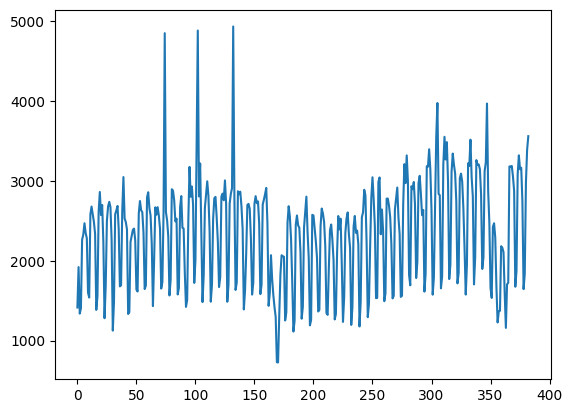

In [ ]:
data["count"].plot()

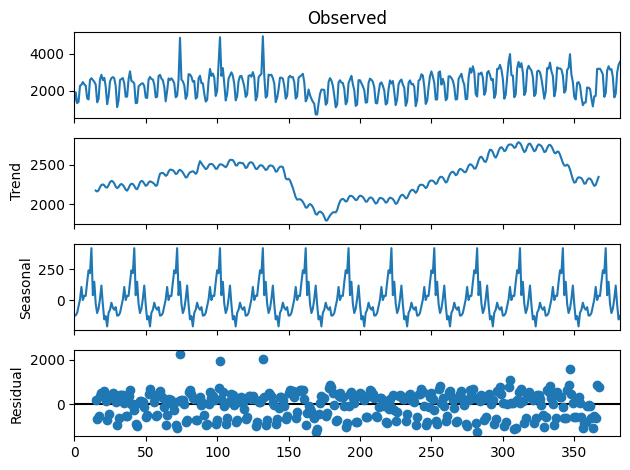

In [ ]:
import statsmodels.api as sn

additive_model = sn.tsa.seasonal_decompose(data['count'].values, period=30, model = "additive")

fig = additive_model.plot()

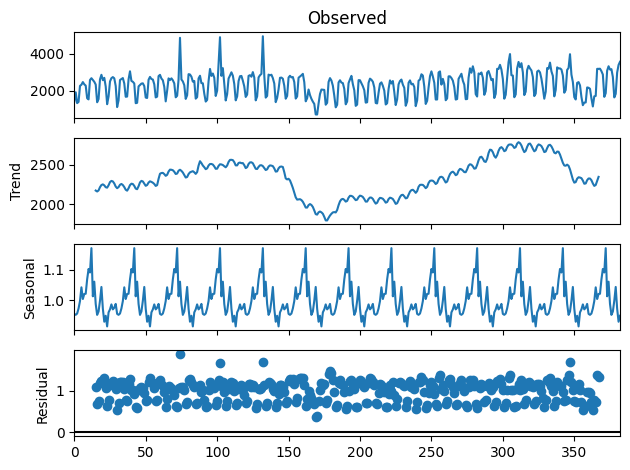

In [ ]:
multiplicative_model = sn.tsa.seasonal_decompose(data['count'].values, period=30, model = "multiplicative")


fig = multiplicative_model.plot()

In [ ]:
data.columns = ['ds', 'y']
data

,ds,y
0,2015-01-01,1414
1,2015-01-02,1920
2,2015-01-03,1338
3,2015-01-04,1404
4,2015-01-05,2264
...,...,...
378,2016-01-16,1644
379,2016-01-17,1836
380,2016-01-18,2983
381,2016-01-19,3389


In [ ]:
model = Prophet(interval_width=0.95)
model.fit(data)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq5rj3vm8/bnid51pe.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq5rj3vm8/k96tlufj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89262', 'data', 'file=/tmp/tmpq5rj3vm8/bnid51pe.json', 'init=/tmp/tmpq5rj3vm8/k96tlufj.json', 'output', 'file=/tmp/tmpq5rj3vm8/prophet_modelxizwfswc/prophet_model-20231102055604.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:56:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:56:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = model.make_future_dataframe(periods = 30)
pred = model.predict(future)

In [ ]:
pred

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-01,2166.681852,1825.143060,3168.611386,2166.681852,2166.681852,306.675262,306.675262,306.675262,306.675262,306.675262,306.675262,0.0,0.0,0.0,2473.357114
1,2015-01-02,2169.422066,1446.946604,2821.225985,2169.422066,2169.422066,-15.946627,-15.946627,-15.946627,-15.946627,-15.946627,-15.946627,0.0,0.0,0.0,2153.475439
2,2015-01-03,2172.162280,640.611308,1978.243962,2172.162280,2172.162280,-850.272013,-850.272013,-850.272013,-850.272013,-850.272013,-850.272013,0.0,0.0,0.0,1321.890267
3,2015-01-04,2174.902494,782.838351,2164.476420,2174.902494,2174.902494,-711.334700,-711.334700,-711.334700,-711.334700,-711.334700,-711.334700,0.0,0.0,0.0,1463.567794
4,2015-01-05,2177.642708,1815.860865,3251.704659,2177.642708,2177.642708,302.074842,302.074842,302.074842,302.074842,302.074842,302.074842,0.0,0.0,0.0,2479.717550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,2016-02-15,2661.718771,2305.386798,3663.840100,2632.085627,2697.145331,302.074842,302.074842,302.074842,302.074842,302.074842,302.074842,0.0,0.0,0.0,2963.793614
409,2016-02-16,2663.349994,2492.787493,3924.822833,2631.978154,2700.658519,538.923492,538.923492,538.923492,538.923492,538.923492,538.923492,0.0,0.0,0.0,3202.273485
410,2016-02-17,2664.981216,2409.284693,3752.383981,2631.264619,2705.048550,429.879745,429.879745,429.879745,429.879745,429.879745,429.879745,0.0,0.0,0.0,3094.860961
411,2016-02-18,2666.612438,2262.960255,3669.460423,2630.353240,2708.645707,306.675262,306.675262,306.675262,306.675262,306.675262,306.675262,0.0,0.0,0.0,2973.287699


Text(0.5, 1.0, 'Prophet Forecast')

<Figure size 1600x800 with 0 Axes>

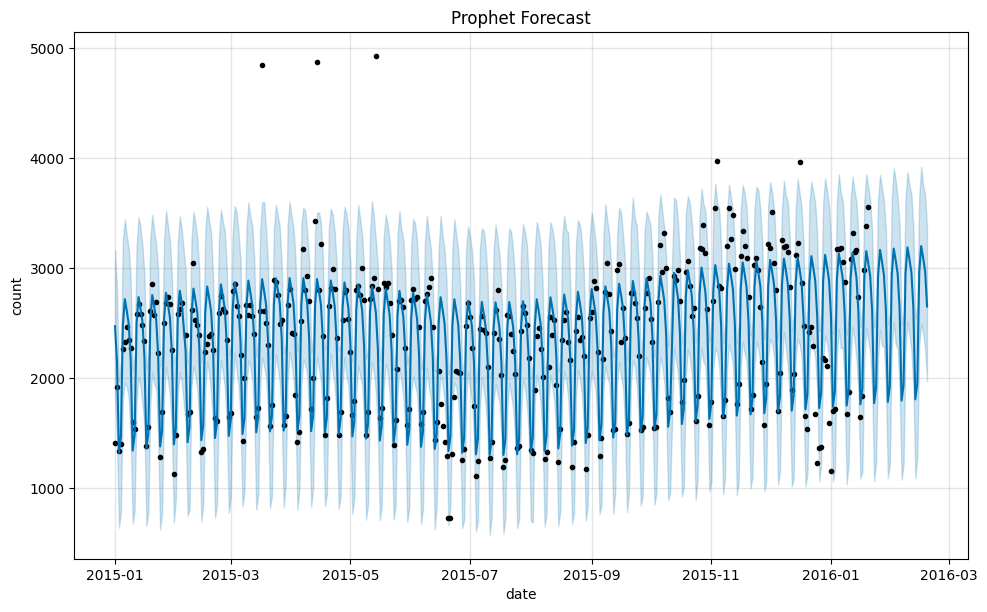

In [ ]:
plt.figure(figsize = (16, 8))
model.plot(pred, xlabel = 'date', ylabel = 'count')
plt.title('Prophet Forecast')

In [ ]:
from neuralprophet import NeuralProphet

/usr/local/lib/python3.10/dist-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/usr/local/lib/python3.10/dist-packages/torchvision/image.so: undefined symbol: _ZN3c104cuda20CUDACachingAllocator9allocatorE'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [ ]:
neural_prophet_model = NeuralProphet(
    batch_size = 32,
     growth="linear",
    changepoints=None,
    n_changepoints=4,
    changepoints_range=0.8,
    trend_reg=0,
    trend_reg_threshold=False,
    yearly_seasonality="auto",
    weekly_seasonality="auto",
    daily_seasonality="auto",
    seasonality_reg=0,
    n_forecasts=1,
    n_lags=0,
    learning_rate=0.1,
    epochs=10,
    loss_func="Huber",
    normalize="auto",
    impute_missing=True
)
neural_prophet_model.fit(data, freq="D")
future = neural_prophet_model.make_future_dataframe(data, periods=30)
forecast = neural_prophet_model.predict(future)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.217% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.217% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO:NP.utils:Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_s

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.217% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.217% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 96.667% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 96.667% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 96.667% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 96.667% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is

Predicting: 12it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


In [ ]:
forecast.head()

,ds,y,yhat1,trend,season_weekly
0,2016-01-21,None,3017.763184,2697.825684,319.937561
1,2016-01-22,None,2748.432129,2701.358398,47.073792
2,2016-01-23,None,1848.153931,2704.891602,-856.737549
3,2016-01-24,None,1991.504028,2708.424316,-716.920349
4,2016-01-25,None,3003.489502,2711.957520,291.532043


In [ ]:
neural_prophet_model.plot(forecast)

WARNING - (NP.plotting.log_warning_resampler_switch_to_valid_env) - Warning: plotly-resampler not supported for the environment you are using. Plotting backend automatically switched to 'plotly' without resampling 


In [ ]:
neural_prophet_model.plot_components(forecast)

WARNING - (NP.plotting.log_warning_resampler_switch_to_valid_env) - Warning: plotly-resampler not supported for the environment you are using. Plotting backend automatically switched to 'plotly' without resampling 
